# LangGraph Practice

Welcome to LangGraph practice notebook. This is where i'll build and test graphs.

In [1]:
! pip install dotenv


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
from dotenv import load_dotenv
# Load environment variables
load_dotenv()

print("Environment loaded.")

Environment loaded.


In [3]:
! pip install langchain
! pip install langgraph 
! pip istall langchain_core
! pip install langchain_google_generativeai


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: unknown command "istall" - maybe you meant "install"

ERROR: Could not find a version that satisfies the requirement langchain_google_generativeai (from versions: none)
ERROR: No matching distribution found for langchain_google_generativeai

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import langgraph.graph

# List all components of the langgraph.graph module
print(dir(langgraph.graph))

['END', 'MessageGraph', 'MessagesState', 'START', 'StateGraph', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_branch', '_node', 'add_messages', 'message', 'state']


In [5]:
from langgraph.graph import START, END, StateGraph
from typing_extensions import TypedDict 
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.runnables import Runnable
from _collections_abc import Sequence

c:\Users\star\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
from typing_extensions import TypedDict
from langchain_core.messages import AIMessage, HumanMessage, BaseMessage

In [7]:
class State(TypedDict):
    messages: Sequence[BaseMessage]
state=State(messages=[HumanMessage(content="who are linkedin top 5 creators?")])
state["messages"][0].pretty_print()

================================ Human Message =================================

who are linkedin top 5 creators?


In [8]:
chat = ChatGoogleGenerativeAI(model="gemini-flash-latest", temperature=0, seed  =365, max_tokens=100)


In [9]:
ai_message = chat.invoke(state["messages"])
ai_message.pretty_print()

================================== Ai Message ==================================

Identifying the "top 5 creators" on LinkedIn is challenging because LinkedIn does not publish an official, definitive, real-time ranking based purely on metrics like follower count, engagement rate, or content performance.

However, based on industry recognition, consistent high-level content creation, massive follower counts, and influence within the professional community, here are the individuals most frequently cited as the **Top 5 most influential or followed creators** on LinkedIn:

---

## The Most Recognized LinkedIn Top Creators


In [10]:
def chatbot(state: State) -> State:
    print("entered chatbot node")
    response = chat.invoke(state["messages"])
    state["messages"].append(response)
    return State(messages=response)

In [11]:
new_state=chatbot(state)
print(new_state)

entered chatbot node
{'messages': AIMessage(content='Identifying the "top 5 creators" on LinkedIn is challenging because LinkedIn does not publish an official, definitive, real-time ranking based purely on metrics like follower count, engagement rate, or content performance.\n\nHowever, based on industry recognition, consistent high-level content creation, massive follower counts, and influence within the professional community, here are the individuals most frequently cited as the **Top 5 most influential or followed creators** on LinkedIn:\n\n---\n\n## The Most Recognized LinkedIn Top Creators', additional_kwargs={}, response_metadata={'finish_reason': 'MAX_TOKENS', 'model_name': 'gemini-2.5-flash-preview-09-2025', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c105e-d5e0-7b13-9e59-2b84ba2ccc82-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 9, 'output_tokens': 99, 'total_tokens': 108, 'input_token_details': {'cache_read': 0}})}


In [12]:
graph=StateGraph(state_schema=State)
graph.add_node("chatbot",chatbot)
graph.add_edge(START, "chatbot")
graph.add_edge("chatbot", END)
graph_compiled=graph.compile()
                

In [13]:
isinstance(graph_compiled, Runnable)


True

In [14]:
isinstance(graph,Runnable)

False

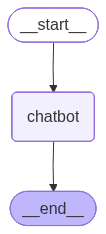

In [15]:
graph_compiled

In [16]:
result_state=graph_compiled.invoke(state)
print(result_state)

entered chatbot node
{'messages': AIMessage(content=" (Based on Influence and Follower Count)\n\nThe list below includes individuals who are consistently recognized for their massive reach and impact on the platform.\n\n### 1. Gary Vaynerchuk (GaryVee)\n*   **Focus:** Entrepreneurship, marketing, social media, motivation.\n*   **Why he's top:** GaryVee is arguably the most recognized entrepreneur on social media globally. His content is highly motivational, focused on work ethic, and often features short,", additional_kwargs={}, response_metadata={'finish_reason': 'MAX_TOKENS', 'model_name': 'gemini-2.5-flash-preview-09-2025', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c105e-e4b1-7dc3-a388-abf6c96659f6-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 109, 'output_tokens': 100, 'total_tokens': 209, 'input_token_details': {'cache_read': 0}})}


In [17]:
! pip install mypy-ipython


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
%load_ext mypy_ipython

In [19]:
from typing import Literal


In [ ]:
def ask_question(state:State)->State:
    print("entered ask_question")
    user_input=input("what do you wanna ask next?")
    return State(messages=[HumanMessage(content=user_input)])

test_state=State(messages=[])
ask_question(test_state)

entered ask_question


In [ ]:
def ask_another_question(state:State)->State:
    print("entered ask_another_question")
    user_input=input("do you wanna ask another question? (yes/no)")
    return State(messages=[HumanMessage(content=user_input)])

test_state2=State(messages=[])
ask_another_question(test_state2)

In [ ]:
def route(state:State)->str:
    if state["messages"][0].content.lower()=="yes":
        return "ask_question"
    else:
        return "END"